In [1]:
%pylab inline
import matplotlib.pylab as plt
import numpy as np
import scipy.misc
import pickle

Populating the interactive namespace from numpy and matplotlib


In [58]:
alldrop_prob_mc = np.load('./exps/exp1/results/finfp_fballdrop_prob.npy') 
fcdrop_prob_mc = np.load('./exps/exp1/results/finfp_fbfcdrop_prob.npy')
alldrop_prob_std = np.load('./exps/exp1/results/finfp_fballdrop_ap_prob.npy') 
fcdrop_prob_std = np.load('./exps/exp1/results/finfp_fbfcdrop_ap_prob.npy')

nodrop_prob = np.load('./exps/exp1/results/finfp_fbnodrop_prob.npy')

yt = np.load('./exps/exp1/results/fin_yt.npy')

print nodrop_prob.shape
print alldrop_prob_mc.shape

(50, 70, 10)
(50, 70, 100, 10)


In [29]:
def entropy_(p_arr):
    sum_ = np.sum(np.array([ -p*np.log(p) for p in p_arr]))
    return sum_

In [33]:
m_all = np.zeros((50,70,10))
m_fc = np.zeros((50,70,10))

v_all = np.zeros((50,70,10))
v_fc = np.zeros((50,70,10))


for i in xrange(50):
    for j in xrange(70):
        for k in xrange(10):
            m_all[i,j,k] =  np.mean(alldrop_prob_mc[i,j,:,k])
            m_fc[i,j,k] = np.mean(fcdrop_prob_mc[i,j,:,k])
            
            #variance
            v_all[i,j,k] =  np.var(alldrop_prob_mc[i,j,:,k])#change as pert the metric you want
            v_fc[i,j,k] = np.var(fcdrop_prob_mc[i,j,:,k])#change as per the metric you want
            
            
            #entropy
            #v_all[i,j,k] =  entropy_(alldrop_prob_mc[i,j,:,k])#change as pert the metric you want
            #v_fc[i,j,k] = entropy_(fcdrop_prob_mc[i,j,:,k])#change as per the metric you want
            
            #variation ratio threshold = 0.6
            
    

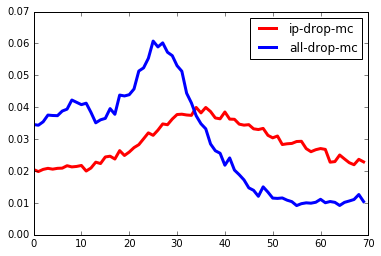

In [78]:
yt.shape
plt.hold(True)
across_steps = np.zeros(70)

for j in xrange(70):
    
    sum_ = 0.0
    for i in xrange(50):
        sum_+=v_fc[i,j,yt[i]]
    across_steps[j] = sum_/50.0

    
plt.plot(across_steps,label='ip-drop-mc',linewidth=3,color='r')


yt.shape

across_steps = np.zeros(70)

for j in xrange(70):
    
    sum_ = 0.0
    for i in xrange(50):
        sum_+=v_all[i,j,yt[i]]
    across_steps[j] = sum_/50.0

plt.plot(across_steps,label='all-drop-mc',linewidth=3,color='b')
plt.legend()

savefig('var.png', bbox_inches='tight')


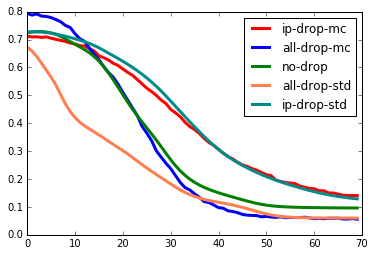

In [83]:
yt.shape
plt.hold(True)
across_steps = np.zeros(70)

for j in xrange(70):
    
    sum_ = 0.0
    for i in xrange(50):
        sum_+=m_fc[i,j,yt[i]]
    across_steps[j] = sum_/50.0

    
plt.plot(across_steps,label='ip-drop-mc',linewidth=3,color='r')


yt.shape

across_steps = np.zeros(70)

for j in xrange(70):
    
    sum_ = 0.0
    for i in xrange(50):
        sum_+=m_all[i,j,yt[i]]
    across_steps[j] = sum_/50.0

plt.plot(across_steps,label='all-drop-mc',linewidth=3,color='b')

yt.shape

across_steps = np.zeros(70)

for j in xrange(70):
    
    sum_ = 0.0
    for i in xrange(50):
        sum_+=nodrop_prob[i,j,yt[i]]
    across_steps[j] = sum_/50.0

plt.plot(across_steps,label='no-drop',linewidth=3,color='g')

for j in xrange(70):
    
    sum_ = 0.0
    for i in xrange(50):
        sum_+=alldrop_prob_std[i,j,yt[i]]
    across_steps[j] = sum_/50.0

plt.plot(across_steps,label='all-drop-std',linewidth=3,color='#FF7F50')

for j in xrange(70):
    
    sum_ = 0.0
    for i in xrange(50):
        sum_+=fcdrop_prob_std[i,j,yt[i]]
    across_steps[j] = sum_/50.0

plt.plot(across_steps,label='ip-drop-std',linewidth=3,color='#008B8B')

plt.legend()

savefig('mean.png', bbox_inches='tight')

In [ ]:

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 8 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        

        
plt.subplot(2,2,2)

fcdrop_prob_mc = np.load('./exps/exp1/results/slow_in_fp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/slow_in_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 8 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)

plt.subplot(2,2,3)

fcdrop_prob_mc = np.load('./exps/exp1/results/slow_in_fp_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/slow_in_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 9

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        


plt.subplot(2,2,4)

fcdrop_prob_mc = np.load('./exps/exp1/results/slow_in_fp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/slow_in_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 9 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=1.0)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        

#savefig('iter_truck.png', bbox_inches='tight')

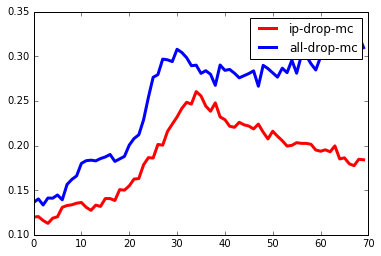

In [80]:
vr_all = np.zeros((50,70))
vr_ip = np.zeros((50,70))

yt

for i in xrange(50):
    for j in xrange(70):

        c = np.zeros(10)
        for k in xrange(100):
            c[np.argmax(alldrop_prob_mc[i,j,k,:])]+=1
        c = 1 - np.max(c)/100.0
        vr_all[i,j] = c


        c = np.zeros(10)
        for k in xrange(100):
            c[np.argmax(fcdrop_prob_mc[i,j,k,:])]+=1
        c = 1 - np.max(c)/100.0
        vr_ip[i,j] = c

vr_ip = np.mean(vr_ip,axis=0)
vr_all = np.mean(vr_all,axis=0)
plt.hold(True)
plt.plot(vr_ip,label='ip-drop-mc',linewidth=3,color='r')
plt.plot(vr_all,label='all-drop-mc',linewidth=3,color='b')
plt.legend()
savefig('var_ratio.png', bbox_inches='tight')

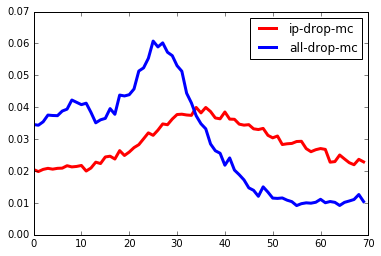

In [79]:
yt.shape
plt.hold(True)
across_steps = np.zeros(70)

for j in xrange(70):
    
    sum_ = 0.0
    for i in xrange(50):
        sum_+=v_fc[i,j,yt[i]]
    across_steps[j] = sum_/50.0

    
plt.plot(across_steps,label='ip-drop-mc',linewidth=3,color='r')


yt.shape

across_steps = np.zeros(70)

for j in xrange(70):
    
    sum_ = 0.0
    for i in xrange(50):
        sum_+=v_all[i,j,yt[i]]
    across_steps[j] = sum_/50.0

plt.plot(across_steps,label='all-drop-mc',linewidth=3,color='b')
plt.legend()

savefig('var.png', bbox_inches='tight')